In [3]:
import datetime
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import csv
import os

In [4]:
os.getcwd()
os.chdir('/Users/rhitommishra/Desktop/HCII:osc/hcii/')

# Read pre-processed data (black and white only) #
preAFST = pd.read_csv('pre_AFST_black_white_only.csv')
postAFST = pd.read_csv('post_AFST_black_white_only.csv')

In [6]:
def stacked_bar_plot(listType, bar_colors, screen_in, screen_out, alg, labels, legend, xLabel="", yLabel="", title=""):
    plt.style.use('ggplot')
    
    fig = plt.figure(figsize=(10,7))
    
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('white')
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('2')
    
    if listType==1:
        plt.rcParams['hatch.linewidth'] = 0.5
        
        p1 = ax.bar(labels, screen_in, color=bar_colors[0], hatch="///", edgecolor='#FFFFFF') #1C6CCC
        p2 = ax.bar(labels, screen_out, bottom=screen_in, color=bar_colors[1])
        
        ax.bar_label(p1, fmt='%.1f%%', label_type='center', fontsize=15, color='#000000')
        ax.bar_label(p2, fmt='%.1f%%', label_type='center', fontsize=15, color='#000000')
    elif listType==2:    
        p1 = ax.bar(labels, screen_in, color=bar_colors[0]) # dark blue
        p2 = ax.bar(labels, screen_out, bottom=screen_in, color=bar_colors[1]) # bright blue
        p3 = ax.bar(labels, alg, bottom=np.array(screen_out)+np.array(screen_in), color='#FFFFFF', edgecolor='#BFC2C5', hatch="///")
        
        ax.bar_label(p1, fmt='%.1f%%', label_type='center', fontsize=15, color='#FFFFFF')
        ax.bar_label(p2, fmt='%.1f%%', label_type='center', fontsize=15, color='#FFFFFF')
        ax.bar_label(p3, ['Screen Out', 'Screen Out'], label_type='center', fontsize=15, color='#000000')
    elif listType==3:    
        p1 = ax.bar(labels, alg, color='#FFFFFF', edgecolor='#BFC2C5', hatch="///")
        p2 = ax.bar(labels, screen_in, bottom=alg, color=bar_colors[0]) # lightest blue 
        p3 = ax.bar(labels, screen_out, bottom=np.array(screen_in)+np.array(alg), color=bar_colors[1]) # med blue 
        
        ax.bar_label(p1, ['Screen In', 'Screen In'], label_type='center', fontsize=15, color='#000000')
        ax.bar_label(p2, fmt='%.1f%%', label_type='center', fontsize=15, color='#000000')
        ax.bar_label(p3, fmt='%.1f%%', label_type='center', fontsize=15, color='#000000')
    
    #Display Labels and Legend #
    plt.ylim(0, 100)
    plt.xlabel(xLabel, fontsize=12)
    plt.ylabel(yLabel, fontsize=12)
    plt.title(title, fontsize=17)
    plt.grid(True, which='both', linestyle=':', linewidth='1', color='black')
    plt.legend(legend, bbox_to_anchor = [1, 1])
    plt.savefig(title)
    plt.show()

In [6]:
# AI Only Decisions #
screen_in=[]
screen_out=[]

total_black_victims = len(postAFST[postAFST['RACE_BLACK_NULL'] == 1])
total_white_victims = len(postAFST[postAFST['RACE_BLACK_NULL'] == 0])

# Black Victims # 

curr_df = postAFST.loc[(postAFST['RACE_BLACK_NULL'] == 1)]

# Screen-In (Max Score >= 15) #
black_screen_in = (len(curr_df[curr_df['MAX_score'] >= 15]) / total_black_victims) * 100 
screen_in.append(round(black_screen_in, 2))

# Screen-Out (Max Score < 15) #
black_screen_out = (len(curr_df[curr_df['MAX_score'] < 15]) / total_black_victims) * 100
screen_out.append(round(black_screen_out, 2))

# White Victims # 
curr_df = postAFST.loc[(postAFST['RACE_BLACK_NULL'] == 0)]

# Screen-In (Max Score >= 15) #
white_screen_in = (len(curr_df[curr_df['MAX_score'] >= 15]) / total_white_victims) * 100
screen_in.append(round(white_screen_in, 2))

# Screen-Out (Max Score < 15) #
white_screen_out = (len(curr_df[curr_df['MAX_score'] < 15]) / total_white_victims) * 100
screen_out.append(round(white_screen_out, 2))


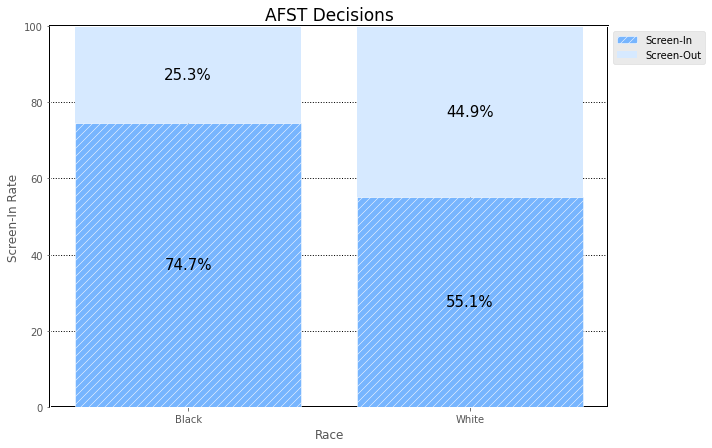

In [9]:
# AI Only Decisions #
stacked_bar_plot(1, ['#77B5FE', '#D6E9FF'], screen_in, screen_out, None, ['Black', 'White'], ['Screen-In', 'Screen-Out'],
                 "Race", "Screen-In Rate", "AFST Decisions")


In [7]:
# Human-AI Decisions #
hai_screen_in = []
hai_screen_out = []

# Black Victims #
curr_df = postAFST.loc[(postAFST['RACE_BLACK_NULL'] == 1)]

# Screened In #
black_screen_in = (len(curr_df[curr_df['SCREEN_OUT_NULL'] == 0]) / total_black_victims) * 100
hai_screen_in.append(round(black_screen_in, 2))

# Screened Out #
black_screen_out = (len(curr_df[curr_df['SCREEN_OUT_NULL'] == 1]) / total_black_victims) * 100
hai_screen_out.append(round(black_screen_out, 2))

# White Victims #
curr_df = postAFST.loc[(postAFST['RACE_BLACK_NULL'] == 0)]

# Screened In #
white_screen_in = (len(curr_df[curr_df['SCREEN_OUT_NULL'] == 0]) / total_white_victims) * 100
hai_screen_in.append(round(white_screen_in, 2))

# Screened Out #
white_screen_out = (len(curr_df[curr_df['SCREEN_OUT_NULL'] == 1]) / total_white_victims) * 100
hai_screen_out.append(round(white_screen_out, 2))

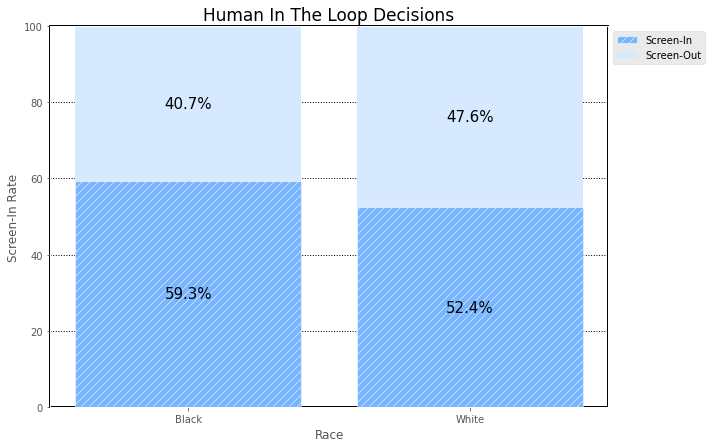

In [11]:
# Human-AI Decisions #
stacked_bar_plot(1, ['#77B5FE', '#D6E9FF'], hai_screen_in, hai_screen_out, None, ['Black', 'White'], ['Screen-In', 'Screen-Out'], "Race", 
                 "Screen-In Rate", "Human In The Loop Decisions")

In [8]:
# Screen-In Breakdown #
hai_screenin_disagree = []
hai_screenin_agree = []

# Black Victims #
# Screen-In Agreement (Max Score >= 15 and Screened In) #
curr_df = postAFST.loc[(postAFST['RACE_BLACK_NULL'] == 1) & (postAFST['MAX_score'] >= 15)]
black_agree = (len(curr_df[curr_df['SCREEN_OUT_NULL'] == 0]) / total_black_victims) * 100
hai_screenin_agree.append(round(black_agree, 2))

# Screen-In Disagreement (Max Score >= 15 and Screened Out) #
black_disagree = (len(curr_df[curr_df['SCREEN_OUT_NULL'] == 1]) / total_black_victims) * 100
hai_screenin_disagree.append(round(black_disagree, 2))

# White Victims #
# Screen-In Agreement (Max Score >= 15 and Screened In) #
curr_df = postAFST.loc[(postAFST['RACE_BLACK_NULL'] == 0) & (postAFST['MAX_score'] >= 15)]
white_agree = (len(curr_df[curr_df['SCREEN_OUT_NULL'] == 0]) / total_white_victims) * 100
hai_screenin_agree.append(round(white_agree, 2))

# Screen-In Disagreement (Max Score >= 15 and Screened Out) #
white_disagree = (len(curr_df[curr_df['SCREEN_OUT_NULL'] == 1]) / total_white_victims) * 100
hai_screenin_disagree.append(round(white_disagree, 2))

In [9]:
# Screen-Out Breakdown #
hai_screenout_disagree = []
hai_screenout_agree = []

# Black Victims #
#Low Risk Agreement (Max Score < 15 and Screened Out) #
curr_df = postAFST.loc[(postAFST['RACE_BLACK_NULL'] == 1) & (postAFST['MAX_score'] < 15)]
black_agree = (len(curr_df[curr_df['SCREEN_OUT_NULL'] == 1]) / total_black_victims) * 100
hai_screenout_agree.append(black_agree)

# Low Risk Disagreement (Max Score < 15 and Screened In) #
black_disagree = (len(curr_df[curr_df['SCREEN_OUT_NULL'] == 0]) / total_black_victims) * 100
hai_screenout_disagree.append(black_disagree)

# White Victims #
#Low Risk Agreement (Max Score < 15 and Screened Out) #
curr_df = postAFST.loc[(postAFST['RACE_BLACK_NULL'] == 0) & (postAFST['MAX_score'] < 15)]
white_agree = (len(curr_df[curr_df['SCREEN_OUT_NULL'] == 1]) / total_white_victims) * 100
hai_screenout_agree.append(white_agree)

# Low Risk Disagreement (Max Score < 15 and Screened In) #
white_disagree = (len(curr_df[curr_df['SCREEN_OUT_NULL'] == 0]) / total_white_victims) * 100
hai_screenout_disagree.append(white_disagree)


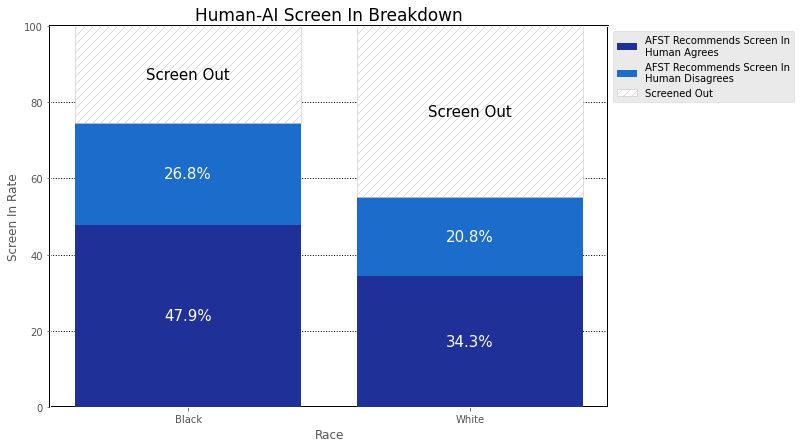

In [14]:
# Screen In Breakdown #
stacked_bar_plot(2, ['#203099','#1C6CCC'], hai_screenin_agree, hai_screenin_disagree, 
                 screen_out, ['Black', 'White'], ['AFST Recommends Screen In\nHuman Agrees', 
                'AFST Recommends Screen In\nHuman Disagrees', 'Screened Out'], "Race", 
                 "Screen In Rate", "Human-AI Screen In Breakdown")

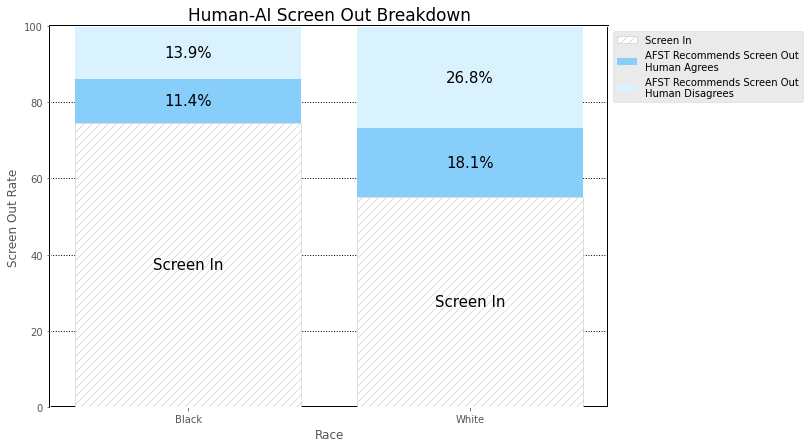

In [15]:
# Screen Out Breakdown #
stacked_bar_plot(3, ['#87CEFA', '#D9F2FE'], hai_screenout_disagree, hai_screenout_agree, 
                 screen_in, ['Black', 'White'], ['Screen In', 'AFST Recommends Screen Out\nHuman Agrees', 
                'AFST Recommends Screen Out\nHuman Disagrees'], "Race", "Screen Out Rate", "Human-AI Screen Out Breakdown")

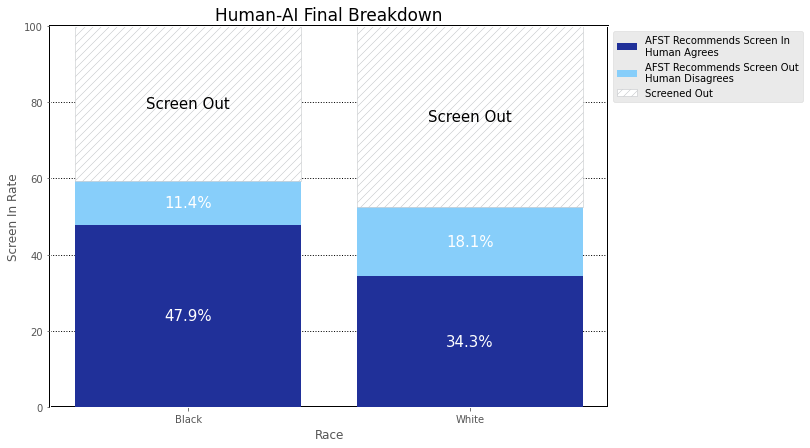

In [16]:
# Screen In Final Breakdown #
screenout = []
for x,y in zip(hai_screenin_agree, hai_screenout_disagree):
    screenout.append(100 - (x + y))
    
stacked_bar_plot(2, ['#203099','#87CEFA'], hai_screenin_agree, hai_screenout_disagree, screenout, ['Black', 'White'], ['AFST Recommends Screen In\nHuman Agrees', 'AFST Recommends Screen Out\nHuman Disagrees', 'Screened Out'], "Race", 
                 "Screen In Rate", "Human-AI Final Breakdown")

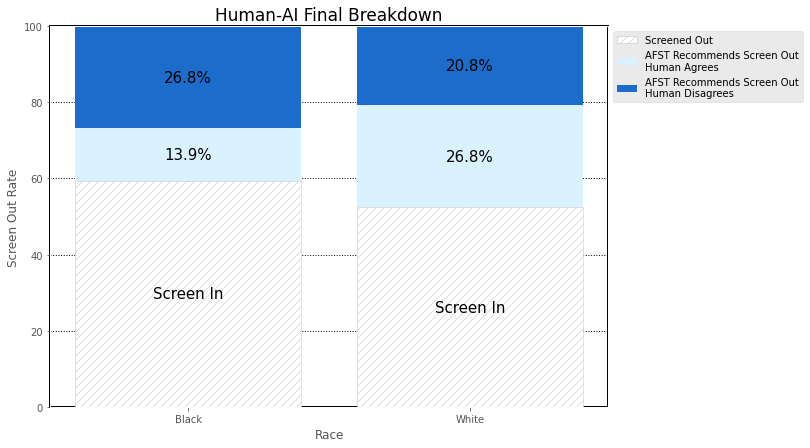

In [17]:
# Screen Out Final Breakdown #
screenin = []
for x,y in zip(hai_screenout_agree, hai_screenin_disagree):
    screenin.append(100 - (x + y))
    
stacked_bar_plot(3, ['#D9F2FE','#1C6CCC'], hai_screenout_agree, hai_screenin_disagree, screenin, ['Black', 'White'], 
                 ['Screened Out', 'AFST Recommends Screen Out\nHuman Agrees', 'AFST Recommends Screen Out\nHuman Disagrees'], "Race", 
                 "Screen Out Rate", "Human-AI Final Breakdown")

In [27]:
def stacked_bar_four(listType, bar_colors, screen_in, screen_out, alg, disagree, labels, legend, xLabel="", yLabel="", title=""):
    fig = plt.figure(figsize=(10,7))
    
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('white')
    ax.patch.set_edgecolor('grey')  
    ax.patch.set_linewidth('1')
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    plt.tight_layout(pad=5)

    
    p1 = ax.bar(labels, screen_in, color=bar_colors[0]) #hai_si_agree
    p2 = ax.bar(labels, screen_out, bottom=screen_in, color=bar_colors[0], edgecolor='#FFFFFF', hatch="//") # si_disagree 
    p3 = ax.bar(labels, alg, bottom=np.array(screen_in)+np.array(screen_out), color=bar_colors[1]) # so_agree 
    p4 = ax.bar(labels, disagree, bottom=np.array(screen_in)+np.array(screen_out)+np.array(alg), 
                color=bar_colors[1], edgecolor='#FFFFFF', hatch="///") # so_disagree 
        
    ax.bar_label(p1, fmt='%.0f%%', label_type='center', fontsize=25, color='#FFFFFF')
    ax.bar_label(p2, fmt='%.0f%%', label_type='center', fontsize=25, color='#FFFFFF')
    ax.bar_label(p3, fmt='%.0f%%', label_type='center', fontsize=25, color='#FFFFFF')
    ax.bar_label(p4, fmt='%.0f%%', label_type='center', fontsize=25, color='#FFFFFF')
    
    plt.ylim(0, 100)
    plt.xlabel(xLabel, fontsize=12)
    plt.ylabel(yLabel, fontsize=12)
    plt.title(title, fontsize=17)
    #plt.grid(True, which='major', axis='y', linestyle=':', linewidth='1', color='grey')
    plt.legend(legend, bbox_to_anchor = [1, 1])
    plt.savefig(title)
    plt.show()
        

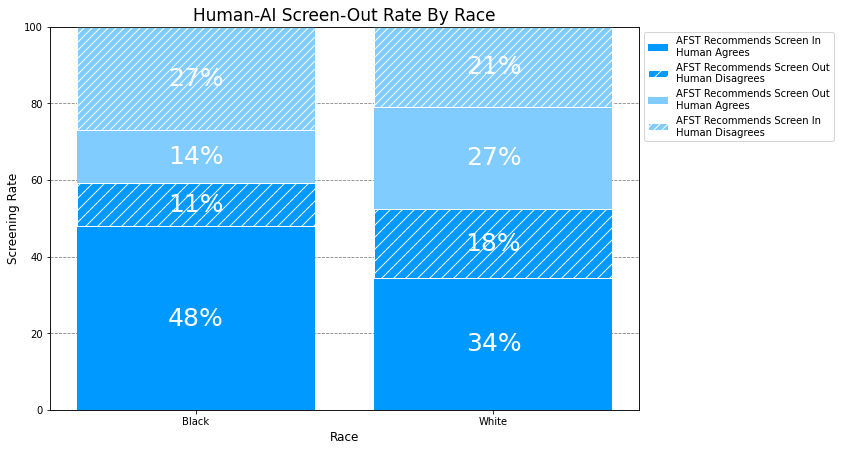

In [28]:
stacked_bar_four(4, ['#0099FF','#80CCFF'], hai_screenin_agree, hai_screenout_disagree,  hai_screenout_agree, hai_screenin_disagree, 
                 ['Black', 'White'], ['AFST Recommends Screen In\nHuman Agrees', 'AFST Recommends Screen Out\nHuman Disagrees',                   
                  'AFST Recommends Screen Out\nHuman Agrees', 'AFST Recommends Screen In\nHuman Disagrees'], 
                 "Race","Screening Rate", "Human-AI Screen-Out Rate By Race")